<html>
    <body>
        <p style="font-size:30px;text-align:center;"><b>Practical 10</b></p>
        <p style="font-size:20px;text-align:center;">Name: KHARE PRATYUSH</p>
        <p style="font-size:20px;text-align:center;">Roll-No: 20BCE519</p>
        <p style="font-size:20px;text-align:center;">Course Name: Machine Learning (2CS501)</p>
    </body>
</html>
    

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
# cancer_dataset
data=pd.read_csv("cancer_dataset.csv",usecols=["Age","Marital Status","N Stage","6th Stage","Grade","A Stage","Tumor Size","Estrogen Status","Progesterone Status","Regional Node Examined","Reginol Node Positive","Survival Months","Status"])
data

,Age,Marital Status,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,Married (including common law),N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,Married (including common law),N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,Married (including common law),N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,Divorced,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,Married (including common law),N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,Married (including common law),N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,Married (including common law),N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,Divorced,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,Married (including common law),N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [2]:
# How many alives and dead 
print(data['Status'].value_counts())

Alive    3408
Dead      616
Name: Status, dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Marital Status          4024 non-null   object
 2   N Stage                 4024 non-null   object
 3   6th Stage               4024 non-null   object
 4   Grade                   4024 non-null   object
 5   A Stage                 4024 non-null   object
 6   Tumor Size              4024 non-null   int64 
 7   Estrogen Status         4024 non-null   object
 8   Progesterone Status     4024 non-null   object
 9   Regional Node Examined  4024 non-null   int64 
 10  Reginol Node Positive   4024 non-null   int64 
 11  Survival Months         4024 non-null   int64 
 12  Status                  4024 non-null   object
dtypes: int64(5), object(8)
memory usage: 408.8+ KB


In [4]:
# figure out the categorical data from the dataset
col=[]
for c in data.columns:
  if(data[c].dtype==object):
    print(c)
    col.append(c)
    print(data[c].unique())
print("\n\n",col)

Marital Status
['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated']
N Stage
['N3' 'N2' 'N1']
6th Stage
['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB']
Grade
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
A Stage
['Regional' 'Distant']
Estrogen Status
['Positive' 'Negative']
Progesterone Status
['Positive' 'Negative']
Status
['Alive' 'Dead']


 ['Marital Status', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


In [5]:
#  we want categorical data converted into numeric data

data['Marital Status']=data['Marital Status'].replace({"Married (including common law)" : 0,"Divorced":1,"Single (never married)":2,"Widowed":3,"Separated":4})
data['N Stage']=data['N Stage'].replace({'N1':0 ,'N2': 1 ,'N3':2})
data['6th Stage']=data['6th Stage'].replace({'IIIC':0,'IIIA':1,'IIB':2, 'IIA':3,'IIIB':4})
data['Grade']=data['Grade'].replace({'Well differentiated; Grade I': 0,'Moderately differentiated; Grade II':1,'Undifferentiated; anaplastic; Grade IV':2,'Poorly differentiated; Grade III':4})
data['A Stage']=data['A Stage'].replace({'Regional':0, 'Distant':1})
data['Estrogen Status']=data['Estrogen Status'].replace({'Positive':0, 'Negative':1})
data['Progesterone Status']=data['Progesterone Status'].replace({'Positive':0, 'Negative':1})
data['Status']=data['Status'].replace({'Alive':0, 'Dead':1})

In [6]:
data.head()


,Age,Marital Status,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,0,2,0,1,0,40,0,0,19,11,1,0
1,47,0,1,1,1,0,45,0,0,25,9,2,0
2,67,0,0,2,4,0,25,0,0,4,1,2,1
3,46,1,0,3,1,0,19,0,0,26,1,2,1
4,63,0,1,1,1,0,35,0,0,21,5,3,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Marital Status          4024 non-null   int64
 2   N Stage                 4024 non-null   int64
 3   6th Stage               4024 non-null   int64
 4   Grade                   4024 non-null   int64
 5   A Stage                 4024 non-null   int64
 6   Tumor Size              4024 non-null   int64
 7   Estrogen Status         4024 non-null   int64
 8   Progesterone Status     4024 non-null   int64
 9   Regional Node Examined  4024 non-null   int64
 10  Reginol Node Positive   4024 non-null   int64
 11  Survival Months         4024 non-null   int64
 12  Status                  4024 non-null   int64
dtypes: int64(13)
memory usage: 408.8 KB


In [8]:
# Data Splitting
x=data.drop("Status",axis=1) # Features 
y=data['Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [9]:
# Feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Without Balancing

In [10]:
# Logistic Regression

In [13]:
l=LogisticRegression()
l.fit(x_train,y_train)
prediction=l.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
lo=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.890728476821192

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1033
           1       0.71      0.42      0.53       175

    accuracy                           0.89      1208
   macro avg       0.81      0.69      0.73      1208
weighted avg       0.88      0.89      0.88      1208


Confusion Matrix : 
 [[1003   30]
 [ 102   73]]


In [14]:
# Gaussian Naive Bayes

In [15]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
prediction=gnb.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
g=metrics.accuracy_score(y_test,prediction)


Accuracy : 
 0.8062913907284768

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1033
           1       0.37      0.46      0.41       175

    accuracy                           0.81      1208
   macro avg       0.64      0.66      0.65      1208
weighted avg       0.83      0.81      0.82      1208


Confusion Matrix : 
 [[893 140]
 [ 94  81]]


In [16]:
# Decision Tree method

In [17]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
d=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.8062913907284768

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1033
           1       0.37      0.47      0.41       175

    accuracy                           0.81      1208
   macro avg       0.64      0.67      0.65      1208
weighted avg       0.83      0.81      0.82      1208


Confusion Matrix : 
 [[892 141]
 [ 93  82]]


In [18]:
# Linear SVM

In [19]:
s=SVC(kernel='linear')
s.fit(x_train,y_train)
prediction=s.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
sv=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.8948675496688742

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1033
           1       0.76      0.41      0.53       175

    accuracy                           0.89      1208
   macro avg       0.83      0.69      0.73      1208
weighted avg       0.88      0.89      0.88      1208


Confusion Matrix : 
 [[1010   23]
 [ 104   71]]


Text(0, 0.5, 'Accuracy')

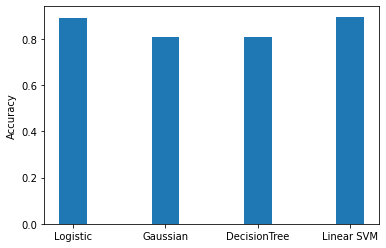

In [20]:
datachart={'Logistic': lo,'Gaussian':g,'DecisionTree':d,'Linear SVM':sv}
keys=list(datachart.keys())
values=list(datachart.values())

plt.bar(keys,values, width=0.3)
plt.ylabel('Accuracy')


# Random OverSampling

In [21]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
oversample=RandomOverSampler(sampling_strategy='minority')
x_over_train,y_over_train=oversample.fit_resample(x_train,y_train)

In [22]:
np.unique(y_over_train,return_counts=True)

(array([0, 1], dtype=int64), array([2375, 2375], dtype=int64))

In [23]:
# scaling
x_over_train=scaler.fit_transform(x_over_train)
x_test=scaler.fit_transform(x_test)

# With Modeling DATA

<h4>Linear SVM</h4>

In [25]:
s=SVC(kernel='linear')
s.fit(x_over_train,y_over_train)
prediction=s.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
sv=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.6208609271523179

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.58      0.72      1033
           1       0.25      0.84      0.39       175

    accuracy                           0.62      1208
   macro avg       0.61      0.71      0.56      1208
weighted avg       0.85      0.62      0.68      1208


Confusion Matrix : 
 [[603 430]
 [ 28 147]]


In [26]:
# Decision Tree Method

In [27]:
dt=DecisionTreeClassifier()
dt.fit(x_over_train,y_over_train)
prediction=dt.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
d=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.7127483443708609

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.26      0.54      0.35       175

    accuracy                           0.71      1208
   macro avg       0.58      0.64      0.58      1208
weighted avg       0.81      0.71      0.75      1208


Confusion Matrix : 
 [[766 267]
 [ 80  95]]


In [28]:
# Gaussian Naive Bayes

In [29]:
gnb=GaussianNB()
gnb.fit(x_over_train,y_over_train)
prediction=gnb.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
g=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.722682119205298

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.73      0.82      1033
           1       0.30      0.68      0.42       175

    accuracy                           0.72      1208
   macro avg       0.61      0.70      0.62      1208
weighted avg       0.84      0.72      0.76      1208


Confusion Matrix : 
 [[754 279]
 [ 56 119]]


In [30]:
# Logistic regression

In [31]:
l=LogisticRegression()
l.fit(x_over_train,y_over_train)
prediction=l.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
lo=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.6167218543046358

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.58      0.72      1033
           1       0.25      0.85      0.39       175

    accuracy                           0.62      1208
   macro avg       0.61      0.71      0.56      1208
weighted avg       0.85      0.62      0.67      1208


Confusion Matrix : 
 [[597 436]
 [ 27 148]]


Text(0, 0.5, 'Accuracy')

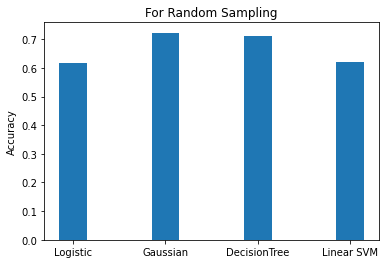

In [32]:
datachart={'Logistic Reg': lo,'Gaussian':g,'DecisionTree':d,'Linear SVM':sv}
keys=list(datachart.keys())
values=list(datachart.values())

plt.title('For Random Sampling')
plt.bar(keys,values, width=0.4)
plt.ylabel('Accuracy')

# SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_train_smote,y_train_smote=oversample.fit_resample(x_train,y_train)

In [34]:
np.unique(y_train_smote,return_counts=True)

(array([0, 1], dtype=int64), array([2375, 2375], dtype=int64))

In [35]:
# scaling
x_train_smote=scaler.fit_transform(x_train_smote)
x_test=scaler.fit_transform(x_test)

In [36]:
# Linear SVM

In [37]:
s=SVC(kernel='linear')
s.fit(x_train_smote,y_train_smote)
prediction=s.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
sv=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.6233443708609272

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1033
           1       0.26      0.83      0.39       175

    accuracy                           0.62      1208
   macro avg       0.60      0.71      0.56      1208
weighted avg       0.85      0.62      0.68      1208


Confusion Matrix : 
 [[607 426]
 [ 29 146]]


In [38]:
# Decision Tree

In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)
prediction=dt.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
d=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.35844370860927155

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.29      0.44      1033
           1       0.15      0.76      0.26       175

    accuracy                           0.36      1208
   macro avg       0.52      0.53      0.35      1208
weighted avg       0.77      0.36      0.41      1208


Confusion Matrix : 
 [[300 733]
 [ 42 133]]


In [40]:
# Gaussian Naive Bayes

In [41]:
gnb=GaussianNB()
gnb.fit(x_train_smote,y_train_smote)
prediction=gnb.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
g=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.7293046357615894

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82      1033
           1       0.31      0.68      0.42       175

    accuracy                           0.73      1208
   macro avg       0.62      0.71      0.62      1208
weighted avg       0.84      0.73      0.77      1208


Confusion Matrix : 
 [[762 271]
 [ 56 119]]


In [42]:
# Logistic regression

In [43]:
l=LogisticRegression()
l.fit(x_train_smote,y_train_smote)
prediction=l.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
lo=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.6225165562913907

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1033
           1       0.25      0.83      0.39       175

    accuracy                           0.62      1208
   macro avg       0.60      0.71      0.56      1208
weighted avg       0.85      0.62      0.68      1208


Confusion Matrix : 
 [[607 426]
 [ 30 145]]


Text(0, 0.5, 'Accuracy')

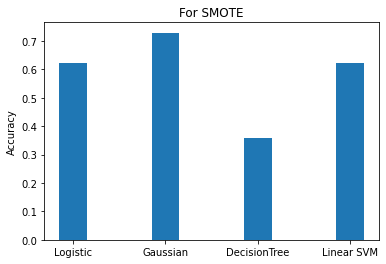

In [44]:
datachart={'Logistic': lo,'Gaussian':g,'DecisionTree':d,'Linear SVM':sv}
keys=list(datachart.keys())
values=list(datachart.values())

plt.title('For SMOTE')
plt.bar(keys,values, width=0.3)
plt.ylabel('Accuracy')

# Borderline SMOTE

In [45]:
from imblearn.over_sampling import BorderlineSMOTE
oversample=BorderlineSMOTE()
x_train_borderSmote,y_train_borderSmote=oversample.fit_resample(x_train,y_train)

In [46]:
np.unique(y_train_borderSmote,return_counts=True)

(array([0, 1], dtype=int64), array([2375, 2375], dtype=int64))

In [47]:
# scaling
x_train_borderSmote=scaler.fit_transform(x_train_borderSmote)
x_test=scaler.fit_transform(x_test)

In [48]:
# Linear SVM

In [49]:
s=SVC(kernel='linear')
s.fit(x_train_borderSmote,y_train_borderSmote)
prediction=s.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
sv=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.625

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1033
           1       0.26      0.83      0.39       175

    accuracy                           0.62      1208
   macro avg       0.60      0.71      0.56      1208
weighted avg       0.85      0.62      0.68      1208


Confusion Matrix : 
 [[610 423]
 [ 30 145]]


In [50]:
# Gaussian Naive Bayes

In [51]:
gnb=GaussianNB()
gnb.fit(x_train_borderSmote,y_train_borderSmote)
prediction=gnb.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
g=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.7334437086092715

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83      1033
           1       0.31      0.69      0.43       175

    accuracy                           0.73      1208
   macro avg       0.62      0.71      0.63      1208
weighted avg       0.84      0.73      0.77      1208


Confusion Matrix : 
 [[766 267]
 [ 55 120]]


In [52]:
# Decision Tree method

In [53]:
dt=DecisionTreeClassifier()
dt.fit(x_train_borderSmote,y_train_borderSmote)
prediction=dt.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
d=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.5314569536423841

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.49      0.64      1033
           1       0.21      0.79      0.33       175

    accuracy                           0.53      1208
   macro avg       0.57      0.64      0.48      1208
weighted avg       0.83      0.53      0.60      1208


Confusion Matrix : 
 [[504 529]
 [ 37 138]]


In [54]:
# Logistic Regression

In [55]:
l=LogisticRegression()
l.fit(x_train_borderSmote,y_train_borderSmote)
prediction=l.predict(x_test)
print("Accuracy : \n",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report: \n",metrics.classification_report(y_test,prediction))
print("\nConfusion Matrix : \n",metrics.confusion_matrix(y_test,prediction))
lo=metrics.accuracy_score(y_test,prediction)

Accuracy : 
 0.6390728476821192

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.61      0.74      1033
           1       0.26      0.82      0.40       175

    accuracy                           0.64      1208
   macro avg       0.61      0.71      0.57      1208
weighted avg       0.85      0.64      0.69      1208


Confusion Matrix : 
 [[629 404]
 [ 32 143]]


Text(0, 0.5, 'Accuracy')

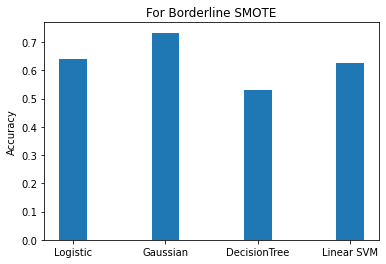

In [56]:
datachart={'Logistic': lo,'Gaussian':g,'DecisionTree':d,'Linear SVM':sv}
keys=list(datachart.keys())
values=list(datachart.values())

plt.title('For Borderline SMOTE')
plt.bar(keys,values, width=0.3)
plt.ylabel('Accuracy')